# Inference for categorical data

To see the entire document please use this link:

https://colab.research.google.com/github/CorkCork/Computational_Math/blob/master/6-Inference_for_Categorical_Data.ipynb

In August of 2012, news outlets ranging from the [Washington Post](https://www.washingtonpost.com/national/on-faith/poll-shows-atheism-on-the-rise-in-the-us/2012/08/13/90020fd6-e57d-11e1-9739-eef99c5fb285_story.html) to the [Huffington Post](https://www.huffpost.com/entry/atheism-rise-religiosity-decline-in-america_n_1777031) ran a story about the rise of atheism in America. The source for the story was a poll that asked people, "Irrespective of whether you attend a place of worship or not, would you say you are a religious person, not a religious person or a convinced atheist?" This type of question, which asks people to classify themselves in one way or another, is common in polling and generates categorical data. In this lab we take a look at the atheism survey and explore what’s at play when making inference about population proportions using categorical data.

## The survey

To access the press release for the poll, conducted by WIN-Gallup International: [GLOBAL INDEX OF
RELIGION AND ATHEISM ](https://sidmennt.is/wp-content/uploads/Gallup-International-um-tr%C3%BA-og-tr%C3%BAleysi-2012.pdf)

Take a moment to review the report then address the following questions.

<div class = 'exercise'>
<h4>Exercise 1</h4>
In the first paragraph, several key findings are reported. Do these percentages appear to be <i>sample statistics</i> (derived from the data sample) or <i>population parameters</i>?
</div>

Yes

<div class = "exercise">
<h4>Exercise 2</h4>
The title of the report is "Global Index of Religiosity and Atheism". To generalize the report's findings to the global human population, what must we assume about the sampling method? Does that seem like a reasonable assumption?</div>

We must assume that the observations are independent and random, and the sample size is large enough (<10% of the population). It is a reasonable assumption.

## The data

Turn your attention to Table 6 (pages 14 and 15), which reports the sample size and response percentages for all 57 countries. While this is a useful format to summarize the data, we will base our analysis on the original data set of individual responses to the survey.

In [1]:
# for Mac OS users only!
# if you run into any SSL certification issues, 
# you may need to run the following command for a Mac OS installation.
# $/Applications/Python 3.x/Install Certificates.command
# if this does not fix the issue, run this command instead.
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context
    
import pandas as pd
import io
import requests
# how to read a csv file from a github account
df_url = 'https://raw.githubusercontent.com/vaksakalli/stats_tutorials/master/atheism.csv'
url_content = requests.get(df_url).content
# print(url_content)
atheism = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

<div class = 'exercise'>
<h4>Exercise 3</h4>
    What does each row of Table 6 correspond to? What does each row of <code>atheism</code> correspond to?
</div>

Sample size and per country percentage of religious, not religious, convinced atheist and don't know/no responses for the sample.
<div>
<code>Atheism</code> corresponds to individual responses in a given country based on whether the person who is being surveyed is identified as atheist or non-atheist.  

To investigate the link between these two ways of organizing this data, take a look at the estimated proportion of atheists in the United States. Towards the bottom of Table 6, we see that this is 5%. We should be able to come to the same number using the `atheism` data.

<div class = 'exercise'>
<h4>Exercise 4</h4>
    Using the command below, create a new dataframe called <code>us12</code> that contains only the rows in <code>atheism</code> associated with respondents to the 2012 survey from the United States. Next, calculate the proportion of atheist responses. Does it agree with the percentage in Table 6? If not, why?
</div>

In [2]:
us12 = atheism[(atheism.nationality == 'United States') & (atheism.year == 2012)]

In [3]:
us12.head()

,nationality,response,year
49925,United States,non-atheist,2012
49926,United States,non-atheist,2012
49927,United States,non-atheist,2012
49928,United States,non-atheist,2012
49929,United States,non-atheist,2012


In [4]:
atheist = us12['response'] == 'atheist'

sum(atheist)/len(us12)

#We can also do sum(us12.response != "atheist") ---952   
# sum(us12.response == "atheist") --- 50
# 50/1002 and get the same result.

0.0499001996007984

Yes, it agrees with the 5% in Table 6 when we round the above number.

## Inference on proportions

As was hinted at in Exercise 1, Table 6 provides statistics, that is, calculations made from the sample of 51,927 people. What we'd like, though, is insight into the population parameters. You answer the question, "What proportion of people in your sample reported being atheists?" with a statistic; while the question "What proportion of people on earth would report being atheists" is answered with an estimate of the parameter.

The inferential tools for estimating population proportion are analogous to those used for means in the last chapter: the confidence interval and the hypothesis test.

<div class = 'exercise'>
<h4>Exercise 5</h4>
Write out the conditions for inference to construct a 95% confidence interval for the proportion of atheists in the United States in 2012. Are you confident all conditions are met?</div>

1- Observations in the sample are independent and random. I can assume those due to it being a survey and due to the sample size, which should be less than 10% of the U.S. population in this case.
<div>
2- The success-failure condition is also met. 

In [5]:
from scipy.stats import norm
import numpy as np 

def atheist_CI(subsetatheist, CI=0.95):
    z = norm.ppf((1-(1-CI)/2))
    prbs = subsetatheist.response.value_counts(normalize=True)
    se = np.sqrt(prbs.prod()/len(us12.index))
    ci = np.array([-1,1]) * z * se + prbs["atheist"]
    print("Our {:.0%} CI: ({:.4f}, {:.4f})".format(CI, *ci))
    return

In [6]:
atheist_CI(us12)

Our 95% CI: (0.0364, 0.0634)


If the conditions for inference are reasonable, we can either calculate the standard error and construct the interval by hand, or we can use [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html), a Python library of useful statistical functions offered by `SciPy`.

In [7]:
conf_lvl = 0.95
z_value = norm.ppf((1-(1-conf_lvl)/2))  # the Z value for the specified confidence level
prbs = us12.response.value_counts(normalize = True)  # the probabilities for the response of atheist and non-atheist
se = np.sqrt(prbs.prod()/len(us12))  # the standard error

# construct a 95% confidence interval for the proportion of atheists in the United States in 2012
ci1 = prbs['atheist'] - z_value * se
ci2 = prbs['atheist'] + z_value * se

# print the results
print(f'Number of successes (atheist) = {len(us12)*prbs[1]}')
print(f'Number of failures (non-atheist) = {len(us12)*prbs[0]}')
print(f'Standard error = {se}')
print(f'{int(conf_lvl*100)}% confidence interval = {ci1, ci2}')

Number of successes (atheist) = 50.0
Number of failures (non-atheist) = 952.0
Standard error = 0.006878629122390021
95% confidence interval = (0.0364183342579056, 0.0633820649436912)


Although formal confidence intervals and hypothesis tests don't show up in the report, suggestions of inference appear at the bottom of page 6: "In general, the error margin for surveys of this kind is ± 3-5% at 95% confidence".

<div class = 'exercise'>
<h4>Exercise 6</h4>
Based on the output, what is the margin of error for the estimate of the proportion of atheists in US in 2012?
</div>

In [8]:
0.0069 * 1.96

0.013524

The margin of error for the estimate of the proportion of atheists in US in 2012 is 1.4%.

<div class = 'exercise'>
<h4>Exercise 7</h4>
Calculate confidence intervals for the proportion of atheists in 2012 in two other countries of your choice, and report the associated margins of error. Be sure to note whether the conditions for inference are met. It may be helpful to create new data sets for each of the two countries first, and then use these data sets to construct the confidence intervals.
</div>

In [9]:
turkey = atheism[(atheism.nationality == 'Turkey') & (atheism.year == 2012)]
turkey.head()

,nationality,response,year
47880,Turkey,non-atheist,2012
47881,Turkey,non-atheist,2012
47882,Turkey,non-atheist,2012
47883,Turkey,non-atheist,2012
47884,Turkey,non-atheist,2012


In [10]:
conf_lvl = 0.95
z_value = norm.ppf((1-(1-conf_lvl)/2))  
prbs = turkey.response.value_counts(normalize = True)  
se = np.sqrt(prbs.prod()/len(us12))  

ci1 = prbs['atheist'] - z_value * se
ci2 = prbs['atheist'] + z_value * se

print(f'Number of successes (atheist) = {len(turkey)*prbs[1]}')
print(f'Number of failures (non-atheist) = {len(turkey)*prbs[0]}')
print(f'Standard error = {se}')
print(f'{int(conf_lvl*100)}% confidence interval = {ci1, ci2}')

Number of successes (atheist) = 21.0
Number of failures (non-atheist) = 1011.0
Standard error = 0.004460378020902818
95% confidence interval = (0.011606656930898759, 0.029091017487705893)


In [11]:
0.0044 * 1.96

0.008624

ME for Turkey is 0.008624

In [12]:
ireland = atheism[(atheism.nationality == 'Ireland') & (atheism.year == 2012)]
ireland.head()

conf_lvl = 0.95
z_value = norm.ppf((1-(1-conf_lvl)/2))  
prbs = ireland.response.value_counts(normalize = True)  
se = np.sqrt(prbs.prod()/len(us12))  

ci1 = prbs['atheist'] - z_value * se
ci2 = prbs['atheist'] + z_value * se

print(f'Number of successes (atheist) = {len(ireland)*prbs[1]}')
print(f'Number of failures (non-atheist) = {len(ireland)*prbs[0]}')
print(f'Standard error = {se}')
print(f'{int(conf_lvl*100)}% confidence interval = {ci1, ci2}')

Number of successes (atheist) = 100.0
Number of failures (non-atheist) = 910.0
Standard error = 0.009435511789541077
95% confidence interval = (0.08051663770689543, 0.1175031642733026)


In [13]:
0.0094 * 1.96

0.018424

ME for Ireland is 0.018424

For both the conditions for inference are met. 
<div>
1- Observations in the samples are independent and random. I can assume those due to them being surveys and due to the sample sizes, which should be less than 10% of the given populations in the above cases.
<div>
2- The success-failure conditions are also met.

## How does the proportion affect the margin of error?

Imagine you've set out to survey 1000 people on two questions: are you female? and are you left-handed? Since both of these sample proportions were calculated from the same sample size, they should have the same margin of error, right? Wrong! While the margin of error does change with sample size, it is also affected by the proportion.

Think back to the formula for the standard error: ${SE}$ = $\sqrt{p(1−p)/n}$. This is then used in the formula for the margin of error for a 95% confidence interval: ${ME}$ = ${1.96}$ x ${SE}$ = ${1.96}$ x $\sqrt{p(1−p)/n}$. Since the population proportion ${p}$ is in this ME formula, it should make sense that the margin of error is in some way dependent on the population proportion. We can visualize this relationship by creating a plot of ${ME}$ vs. ${p}$.

The first step is to define an array `p` that is a sequence from 0 to 1 with each number separated by 0.01. We can then create a array of the margin of error (`me`) associated with each of these values of `p` using the familiar approximate formula (${ME}$ = ${2}$×${SE}$). Lastly, we plot the two vectors against each other to reveal their relationship.

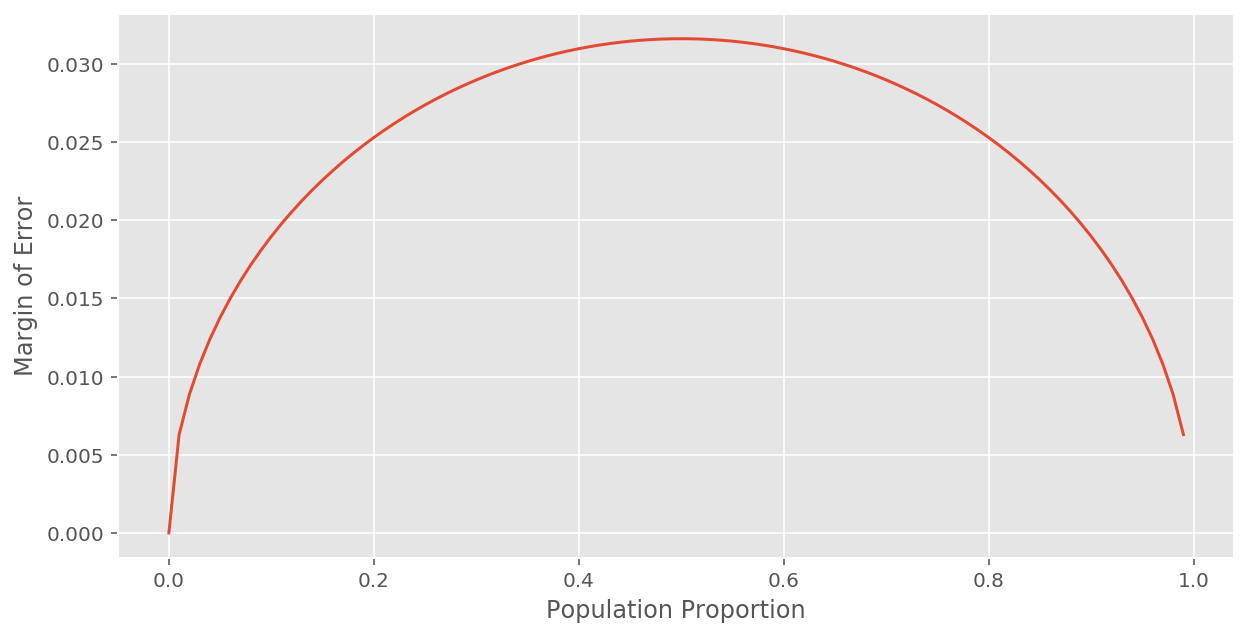

In [14]:
import numpy as np
n = 1000
p = np.arange(0, 1, 0.01)
me = 2 * np.sqrt(p * (1 - p)/n)

import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(p, me)
plt.xlabel('Population Proportion')
plt.ylabel('Margin of Error')
plt.show();

## Success-failure condition

The textbook emphasizes that you must always check conditions before making inference. For inference on proportions, the sample proportion can be assumed to be nearly normal if it is based upon a random sample of independent observations and if both ${np}$ ≥ ${10}$ and ${n}$(${1 - p}$) ≥ ${10}$. This rule of thumb is easy enough to follow, but it makes one wonder: what’s so special about the number 10?

The short answer is: nothing. You could argue that we would be fine with 9 or that we really should be using 11. What is the "best" value for such a rule of thumb is, at least to some degree, arbitrary. However, when ${np}$ and ${n}$(${1 − np}$) reaches 10 the sampling distribution is sufficiently normal to use confidence intervals and hypothesis tests that are based on that approximation.

We can investigate the interplay between ${n}$ and ${p}$ and the shape of the sampling distribution by using simulations. To start off, we simulate the process of drawing 5000 samples of size 1040 from a population with a true atheist proportion of 0.1. For each of the 5000 samples we compute ${\hat{p}}$ and then plot a histogram to visualize their distribution.

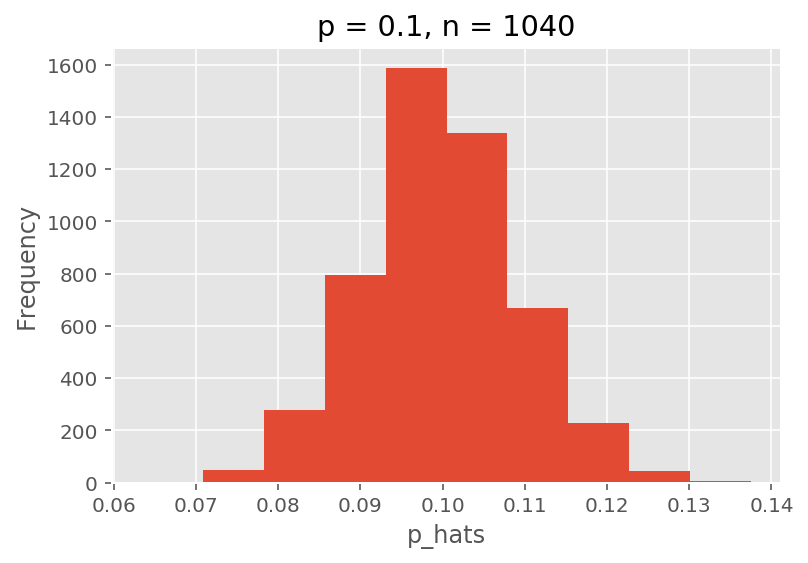

In [15]:
p = 0.1
n = 1040
p_hats = np.zeros(5000)

for i in range(5000):
    samp = np.random.choice(['atheist', 'non_atheist'], size = n, replace = True, p = [p, 1-p])
    p_hats[i] = sum(samp == 'atheist')/n

plt.hist(p_hats)
plt.xlabel('p_hats')
plt.ylabel('Frequency')
plt.title('p = 0.1, n = 1040')
plt.show();

These commands build up the sampling distribution of ${\hat{p}}$ using the familiar `for` loop. You can read the sampling procedure for the first line of code inside the `for` loop as, "take a sample of size ${n}$ with replacement from the choices of atheist and non-atheist with probabilities  ${p}$  and  ${1 - p}$ , respectively." The second line in the loop says, "calculate the proportion of atheists in this sample and record this value." The loop allows us to repeat this process 5,000 times to build a good representation of the sampling distribution.

<div class = 'exercise'>
<h4>Exercise 9</h4>
Describe the sampling distribution of sample proportions at  ${n = 1040}$ and  ${p = 0.1}$. Be sure to note the center, spread, and shape.<br><i>Hint</i>: Remember that Python has functions such as <code>mean</code> to calculate summary statistics.
</div>

In [16]:
p_hats.mean()

0.0998226923076923

In [17]:
p_hats.std()

0.00936084220121119

In [18]:
import scipy.stats as stats
stats.describe(p_hats)

DescribeResult(nobs=5000, minmax=(0.06346153846153846, 0.1375), mean=0.0998226923076923, variance=8.764289529503535e-05, skewness=0.10123844541308624, kurtosis=0.08576691100390832)

It is a normal distribution centered around 0.1 and has a standard deviation around 0.01. There is no noticable skew.

<div class = 'exercise'>
<h4>Exercise 10</h4>
Repeat the above simulation three more times but with modified sample sizes and proportions: for ${n = 400}$ and ${p = 0.1}$, ${n = 1040}$ and ${p = 0.02}$, and ${n = 400}$ and ${p = 0.02}$. Plot all four histograms together using <code>subplot</code>. Describe the three new sampling distributions. Based on these limited plots, how does ${n}$ appear to affect the distribution of ${\hat{p}}$? How does ${p}$ affect the sampling distribution?
</div>

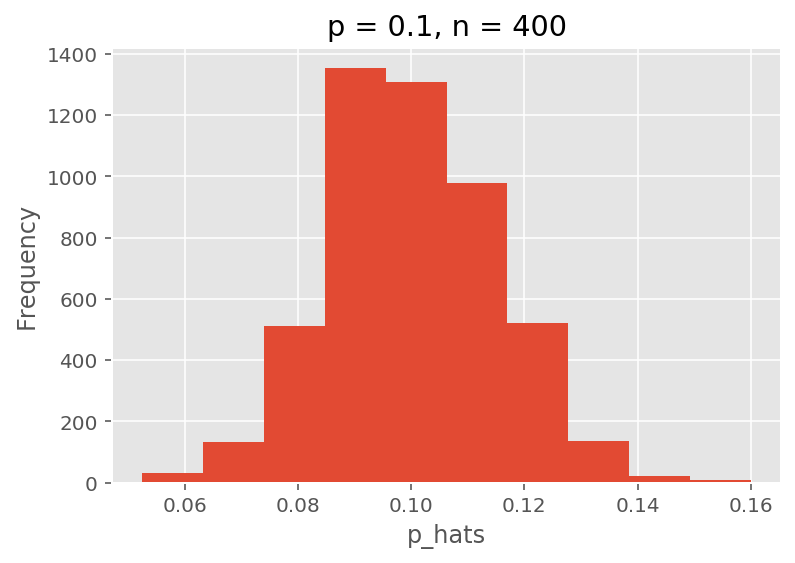

In [19]:
p = 0.1
n = 400
p_hats = np.zeros(5000)

for i in range(5000):
    samp = np.random.choice(['atheist', 'non_atheist'], size = n, replace = True, p = [p, 1-p])
    p_hats[i] = sum(samp == 'atheist')/n

plt.hist(p_hats)
plt.xlabel('p_hats')
plt.ylabel('Frequency')
plt.title('p = 0.1, n = 400')
plt.show();

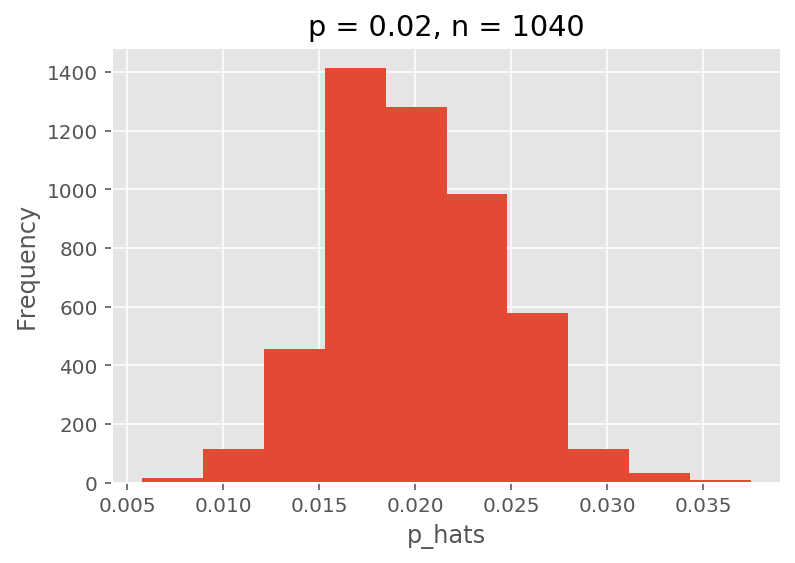

In [20]:
p = 0.02
n = 1040
p_hats = np.zeros(5000)

for i in range(5000):
    samp = np.random.choice(['atheist', 'non_atheist'], size = n, replace = True, p = [p, 1-p])
    p_hats[i] = sum(samp == 'atheist')/n

plt.hist(p_hats)
plt.xlabel('p_hats')
plt.ylabel('Frequency')
plt.title('p = 0.02, n = 1040')
plt.show();

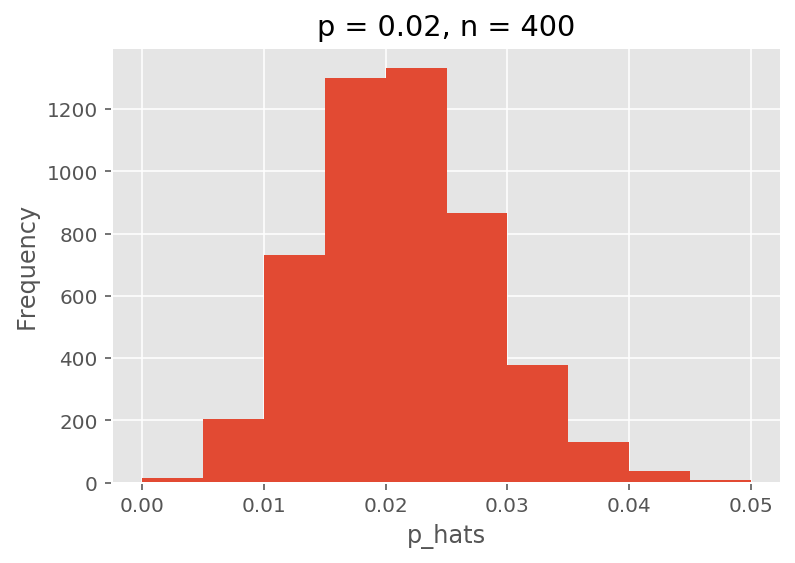

In [21]:
p = 0.02
n = 400
p_hats = np.zeros(5000)

for i in range(5000):
    samp = np.random.choice(['atheist', 'non_atheist'], size = n, replace = True, p = [p, 1-p])
    p_hats[i] = sum(samp == 'atheist')/n

plt.hist(p_hats)
plt.xlabel('p_hats')
plt.ylabel('Frequency')
plt.title('p = 0.02, n = 400')
plt.show();

The larger the sample size (n), the smaller the spread. As the sample size gets bigger, we see a more clear normal distribution. Smaller spread means smaller margin of error. Meanwhile, the larger the p, the smaller the spread hence larger margin of error. There is a center shift with larger p. With smaller sample size the distribution is centered around p.

<div class = 'exercise'>
<h4>Exercise11</h4>
If you refer to Table 6, you'll find that Australia has a sample proportion of 0.1 on a sample size of 1040, and that Ecuador has a sample proportion of 0.02 on 400 subjects. Let's suppose for this exercise that these point estimates are actually the truth. Then given the shape of their respective sampling distributions, do you think it is sensible to proceed with inference and report margin of errors, as the reports does?
</div>

Let's check the success-failure condition.

In [22]:
#Australia
n_aus = 1040
p_aus = 0.1

cond_aus = (n_aus * p_aus >= 10, n_aus * (1 - p_aus) >= 10)
cond_aus

(True, True)

In [23]:
#Ecuador
n_ecu = 400
p_ecu = 0.02

cond_ecu = (n_ecu * p_ecu >= 10, n_ecu * (1 - p_ecu) >= 10)
cond_ecu

(False, True)

We can't report margin of errors for Ecuador because it doesn't meet the success-failure condition. The distribution is far from normal to make inferences. We can proceed with inference and report margin of error for Australia.

---
## On Your Own

The question of atheism was asked by WIN-Gallup International in a similar survey that was conducted in 2005. (We assume here that sample sizes have remained the same.) Table 4 on page 12 of the report summarizes survey results from 2005 and 2012 for 39 countries.

1- Answer the following two questions. As always, write out the hypotheses for any tests you conduct and outline the status of the conditions for inference.

a) Is there convincing evidence that Spain has seen a change in its atheism index between 2005 and 2012?<br>
        <i>Hint</i>: Create a new data set for respondents from Spain. Form confidence intervals for the true proportion of athiests in both years, and determine whether they overlap.</li><br>

H0: There is no difference in the proportion of atheists between the years 2005 and 2012 in Spain.
<div>
HA: Tthere is a difference in the proportion of atheists between the years 2005 and 2012 in Spain.
<div> 
Conditions:
<div> 
- Observations are independent and random.
    <div> 
- The sample size is large enough.
        <div> 
- Success/failure condition met for both samples.

In [24]:
spain2012 = atheism[(atheism.nationality == 'Spain') & (atheism.year == 2012)]
spain2012.head()

conf_lvl = 0.95
z_value = norm.ppf((1-(1-conf_lvl)/2))  
prbs = spain2012.response.value_counts(normalize = True)  
se = np.sqrt(prbs.prod()/len(us12))  

ci1 = prbs['atheist'] - z_value * se
ci2 = prbs['atheist'] + z_value * se

print(f'Number of successes (atheist) = {len(spain2012)*prbs[1]}')
print(f'Number of failures (non-atheist) = {len(spain2012)*prbs[0]}')
print(f'Standard error = {se}')
print(f'{int(conf_lvl*100)}% confidence interval = {ci1, ci2}')

Number of successes (atheist) = 102.99999999999999
Number of failures (non-atheist) = 1042.0
Standard error = 0.00903884885676943
95% confidence interval = (0.07224051365676012, 0.10767215009869838)


In [25]:
spain2005 = atheism[(atheism.nationality == 'Spain') & (atheism.year == 2005)]
spain2005.head()

conf_lvl = 0.95
z_value = norm.ppf((1-(1-conf_lvl)/2))  
prbs = spain2005.response.value_counts(normalize = True)  
se = np.sqrt(prbs.prod()/len(us12))  

ci1 = prbs['atheist'] - z_value * se
ci2 = prbs['atheist'] + z_value * se

print(f'Number of successes (atheist) = {len(spain2005)*prbs[1]}')
print(f'Number of failures (non-atheist) = {len(spain2005)*prbs[0]}')
print(f'Standard error = {se}')
print(f'{int(conf_lvl*100)}% confidence interval = {ci1, ci2}')

Number of successes (atheist) = 115.0
Number of failures (non-atheist) = 1031.0
Standard error = 0.009492044693202738
95% confidence interval = (0.08174497440129413, 0.11895310587793798)


The confidence interval for Spain2005 is (0.082 , 0.119) and for Spain2012 (0.072, 0.108). They overlap, which shows that there is no convincing evidence that Spain has seen a change in its atheism index.

b) Is there convincing evidence that the United States has seen a change in its atheism index between 2005 and 2012?</li>

H0: There is no difference in the proportion of atheists between the years 2005 and 2012 in the United States.
<div>
HA: Tthere is a difference in the proportion of atheists between the years 2005 and 2012 in the United States.
<div> 
Conditions:
<div> 
- Observations are independent and random.
    <div> 
- The sample size is large enough.
        <div> 
- Success/failure condition met for both samples.

In [26]:
us2012 = atheism[(atheism.nationality == 'United States') & (atheism.year == 2012)]
us2012.head()

conf_lvl = 0.95
z_value = norm.ppf((1-(1-conf_lvl)/2))  
prbs = us2012.response.value_counts(normalize = True)  
se = np.sqrt(prbs.prod()/len(us12))  

ci1 = prbs['atheist'] - z_value * se
ci2 = prbs['atheist'] + z_value * se

print(f'Number of successes (atheist) = {len(us2012)*prbs[1]}')
print(f'Number of failures (non-atheist) = {len(us2012)*prbs[0]}')
print(f'Standard error = {se}')
print(f'{int(conf_lvl*100)}% confidence interval = {ci1, ci2}')

Number of successes (atheist) = 50.0
Number of failures (non-atheist) = 952.0
Standard error = 0.006878629122390021
95% confidence interval = (0.0364183342579056, 0.0633820649436912)


In [27]:
us2005 = atheism[(atheism.nationality == 'United States') & (atheism.year == 2005)]
us2005.head()

conf_lvl = 0.95
z_value = norm.ppf((1-(1-conf_lvl)/2))  
prbs = us2005.response.value_counts(normalize = True)  
se = np.sqrt(prbs.prod()/len(us12))  

ci1 = prbs['atheist'] - z_value * se
ci2 = prbs['atheist'] + z_value * se

print(f'Number of successes (atheist) = {len(us2005)*prbs[1]}')
print(f'Number of failures (non-atheist) = {len(us2005)*prbs[0]}')
print(f'Standard error = {se}')
print(f'{int(conf_lvl*100)}% confidence interval = {ci1, ci2}')

Number of successes (atheist) = 10.0
Number of failures (non-atheist) = 992.0
Standard error = 0.0031401779071852207
95% confidence interval = (0.0038254043170282874, 0.016134675523291075)


The confidence interval for US 2005 is (0.004, 0.016) and for US 2012 (0.036, 0.063). They do not overlap, which shows that there is convincing evidence that US has seen a change in its atheism index.

2- If in fact there has been no change in the atheism index in the countries listed in Table 4, in how many of those countries would you expect to detect a change (at a significance level of 0.05) simply by chance?
Hint: Look in the textbook index under Type 1 error.

A type 1 error is rejecting the null hypothesis when null is true. We shouldn't incorectly reject null more than 5% of the time (0.05 significance level). There are 39 countries in Table 4. We can multiply that number with 0.05 to see how many of those countries we would expect to detect a change simply by chance. 

In [28]:
0.05*39

1.9500000000000002

The result is 1.95, which means 2 countries.

3- Suppose you’re hired by the local government to estimate the proportion of residents that attend a religious service on a weekly basis. According to the guidelines, the estimate must have a margin of error no greater than 1% with 95% confidence. You have no idea what to expect for  𝑝 . How many people would you have to sample to ensure that you are within the guidelines?
Hint: Refer to your plot of the relationship between  𝑝  and margin of error. Do not use the data set to answer this question.

In [29]:
zscore = 1.96
ME = 0.01
P = 0.5
N = ((zscore**2) * .25/ME**2)
N

9603.999999999998

We need a sample size of 9604.

<div class = "license">
This lab was adapted by Vural Aksakalli and Imran Ture from OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.
</div>

***
www.featureranking.com